<a href="https://colab.research.google.com/github/hairymax/Python-for-science-lecture-notes/blob/main/02_NumPy/2.4.advanced_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Продвинутые операции

Этот ноутбук является переводом раздела [Advanced operations](https://scipy-lectures.org/intro/numpy/advanced_operations.html) из онлайн-курса [scipy-lectures](https://scipy-lectures.org/)

Данные из ноутбука могут быть скачаны из [репозитория GitHub](https://github.com/hairymax/Python-for-science-lecture-notes/tree/main/02_NumPy) 

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Полиномы

*NumPy* также содержит многочлены в разных базисах:  
Например, 
$$3x^2+2x-1$$

In [2]:
p = np.poly1d([3, 2, -1])
p(0)

-1

In [3]:
p.roots     # корни

array([-1.        ,  0.33333333])

In [4]:
p.order     # порядок полинома

2

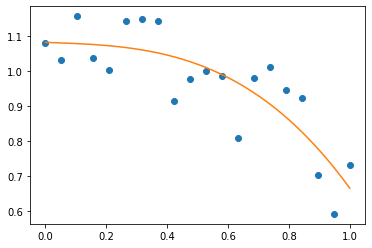

In [5]:
x = np.linspace(0, 1, 20)
y = np.cos(x) + 0.3*np.random.rand(20)
p = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(0, 1, 200) # используйте большее количество точек для более плавного графика

plt.plot(x, y, 'o', t, p(t), '-');

Более подробно в справке по [`poly1d`](http://numpy.org/doc/stable/reference/routines.polynomials.poly1d.html)

*NumPy* также имеет более сложный интерфейс, который поддерживает, например, полиномы Чебышева.
$$3x^2+2x-1$$

In [6]:
p = np.polynomial.Polynomial([-1, 2, 3]) # коэффициенты в другом порядке!
p(0)

-1.0

In [7]:
p.roots()

array([-1.        ,  0.33333333])

In [8]:
p.degree()  # В общем случае многочлены не всегда отображают `order`

2

Пример использования полиномов в базисе Чебышева, для многочленов в диапазоне `[-1, 1]`:

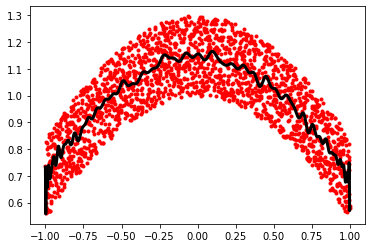

In [9]:
x = np.linspace(-1, 1, 2000)
y = np.cos(x) + 0.3*np.random.rand(2000)
p = np.polynomial.Chebyshev.fit(x, y, 90)

plt.plot(x, y, 'r.')   
plt.plot(x, p(x), 'k-', lw=3);

Полиномы Чебышева имеют некоторые преимущества при интерполяции.

## Загрузка файлов данных

### Текстовые файлы

Пример:  [`populations.txt`](https://scipy-lectures.org/_downloads/populations.txt)
(Необходимо скачать по ссылке и разместить в папке с тетрадкой Jupyter)

Первые строки это файла имеют следующее содержимое:
```
# year  hare    lynx    carrot
1900    30e3    4e3     48300
1901    47.2e3  6.1e3   48200
1902    70.2e3  9.8e3   41500
1903    77.4e3  35.2e3  38200
```

Загрузка данных из файла

In [10]:
data = np.loadtxt('populations.txt')
data 

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

Запись данных в файл

In [11]:
np.savetxt('pop2.txt', data)
data2 = np.loadtxt('pop2.txt')
data2

array([[ 1900., 30000.,  4000., 48300.],
       [ 1901., 47200.,  6100., 48200.],
       [ 1902., 70200.,  9800., 41500.],
       [ 1903., 77400., 35200., 38200.],
       [ 1904., 36300., 59400., 40600.],
       [ 1905., 20600., 41700., 39800.],
       [ 1906., 18100., 19000., 38600.],
       [ 1907., 21400., 13000., 42300.],
       [ 1908., 22000.,  8300., 44500.],
       [ 1909., 25400.,  9100., 42100.],
       [ 1910., 27100.,  7400., 46000.],
       [ 1911., 40300.,  8000., 46800.],
       [ 1912., 57000., 12300., 43800.],
       [ 1913., 76600., 19500., 40900.],
       [ 1914., 52300., 45700., 39400.],
       [ 1915., 19500., 51100., 39000.],
       [ 1916., 11200., 29700., 36700.],
       [ 1917.,  7600., 15800., 41800.],
       [ 1918., 14600.,  9700., 43300.],
       [ 1919., 16200., 10100., 41300.],
       [ 1920., 24700.,  8600., 47300.]])

**Примечание**. Если текстовый файл имеет сложную структуру, можно использовать:
- `np.genfromtxt`
- функции ввода-вывода *Python* и, например, регулярные выражений парсинга строковых выражений (*Python* довольно хорошо подходит для этого)

Напоминание: Навигация по файловой системе с помощью IPython

In [12]:
pwd

'/content'

In [13]:
ls

plot.png  pop2.txt  populations.txt  sample_data/
pnu.jpg   pop.npy   red_pnu.png      tiny_pnu.png


## Изображения

Загрузим изображение ТОГУ [pnu.jpg](https://drive.google.com/uc?export=download&id=1uEm7u52mpmol5nmGQUh_Scw_5yEUDIIy) (Необходимо скачать по ссылке и разместить в папке с тетрадкой Jupyter)  

С использованием Matplotlib

In [14]:
img = plt.imread('pnu.jpg')
img.shape, img.dtype

((412, 550, 3), dtype('uint8'))

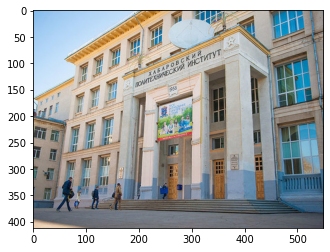

In [15]:
plt.imshow(img)  
plt.savefig('plot.png')

In [16]:
plt.imsave('red_pnu.png', img[:,:,0], cmap=plt.cm.gray)

Эта команда сохранила изображение только с одним каналом (из RGB):

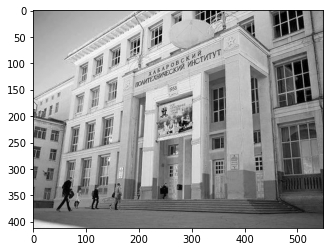

In [17]:
plt.imshow(plt.imread('red_pnu.png'));  

Другие библиотеки:

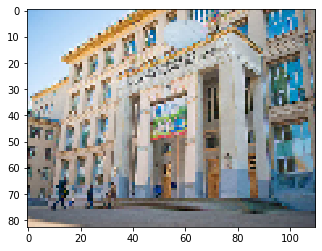

In [18]:
import imageio
imageio.imsave('tiny_pnu.png', img[::5,::5])
plt.imshow(plt.imread('tiny_pnu.png'), interpolation='nearest');

### Собственный формат *NumPy*

*NumPy* имеет свой собственный двоичный формат, не `portable`, но с эффективным вводом-выводом:

In [19]:
data = np.ones((3, 3))
np.save('pop.npy', data)
data3 = np.load('pop.npy')

Хорошо известные (и более малоизвестные) форматы файлов

1. HDF5: [h5py](http://www.h5py.org/), [PyTables](http://www.pytables.org/)

2. NetCDF: `scipy.io.netcdf_file`, [netcdf4-python](http://code.google.com/p/netcdf4-python/), …

3. Matlab: `scipy.io.loadmat`, `scipy.io.savemat`

4. MatrixMarket: `scipy.io.mmread`, `scipy.io.mmwrite`

5. IDL: `scipy.io.readsav`

На земетку, если существует некоторый широкоиспользуемый формат, то вероятно, для него также есть библиотека *Python*.

## **Упражнение: Текстовые файлы данных**

Напишите скрипт Python, который загружает данные из файла `populations.txt`, отбрасывает последний столбец и первые 5 строк. Сохраните уменьшенный набор данных в файле `pop2.txt`.